In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

data = pd.merge(customers, transactions, on='CustomerID')


data.fillna(0, inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))


dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    dbi = davies_bouldin_score(scaled_data, clusters)
    dbi_scores.append((k, dbi))
    
best_k = min(dbi_scores, key=lambda x: x[1])[0]
print(f"Optimal number of clusters based on DB Index: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)




Optimal number of clusters based on DB Index: 8


In [3]:
data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,Cluster
0,C0001,Lawrence Carroll,South America,10-07-2022,T00015,P054,19-01-2024 03:12,2,114.60,57.30,2
1,C0001,Lawrence Carroll,South America,10-07-2022,T00932,P022,17-09-2024 09:01,3,412.62,137.54,4
2,C0001,Lawrence Carroll,South America,10-07-2022,T00085,P096,08-04-2024 00:01,2,614.94,307.47,5
3,C0001,Lawrence Carroll,South America,10-07-2022,T00445,P083,07-05-2024 03:11,2,911.44,455.72,5
4,C0001,Lawrence Carroll,South America,10-07-2022,T00436,P029,02-11-2024 17:04,3,1300.92,433.64,6
...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,11-06-2023,T00518,P034,11-12-2024 03:05,4,868.20,217.05,7
996,C0200,Kelly Cross,Asia,11-06-2023,T00091,P057,27-04-2024 19:06,1,239.70,239.70,0
997,C0200,Kelly Cross,Asia,11-06-2023,T00731,P061,15-07-2024 20:36,4,627.84,156.96,7
998,C0200,Kelly Cross,Asia,11-06-2023,T00771,P048,10-09-2024 09:50,4,1665.60,416.40,3


In [4]:
kmeans

KMeans(random_state=42)

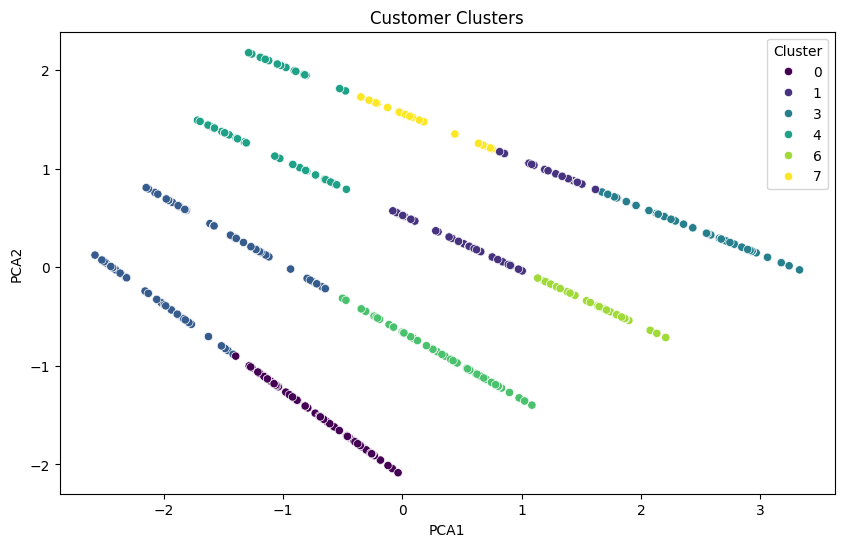

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'], data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Clusters')
plt.show()

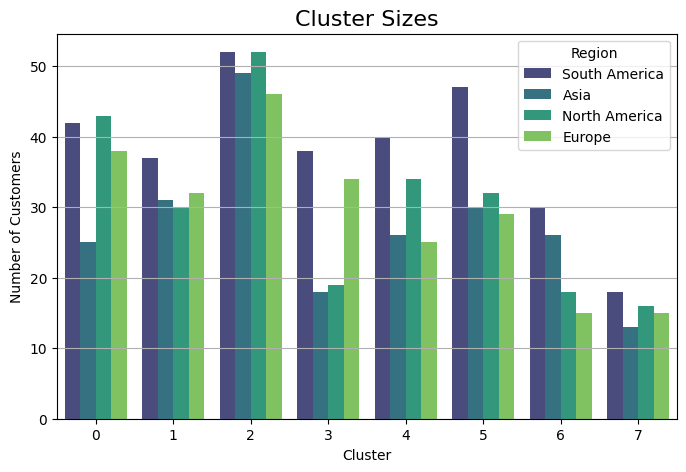

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data, palette='viridis',hue='Region')
plt.title('Cluster Sizes', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.show()